<a href="https://colab.research.google.com/github/Zefandion/Capstone-Project_CC25-CR388/blob/main/Prediksi_Penyakit_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [21]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Memuat Dataset

Submber: https://www.kaggle.com/datasets/717451f4573e9c3d8963e626808ade67a89fbd2ee660be008c1aba16b2a2345a

In [2]:
# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Data Loading

In [3]:
# Tampilkan 5 data teratas untuk memastikan
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Statistik deskriptif untuk data numerik
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
# Ukuran dataset
print("Jumlah baris dan kolom:", df.shape)

# Tipe data setiap kolom
print("\nTipe data per kolom:")
print(df.dtypes)

Jumlah baris dan kolom: (100000, 9)

Tipe data per kolom:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


# Cleaning

In [7]:
# Cek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [8]:
# Periksa data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 3854


Atasi data duplicate

In [9]:
df.drop_duplicates(inplace = True)

In [11]:
# Periksa kembali data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


In [12]:
# Ukuran dataset
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (96146, 9)


In [13]:
print(df['diabetes'].value_counts())

diabetes
0    87664
1     8482
Name: count, dtype: int64


# Preprocessing

- Encode gender dan smoking_history (kolom kategorikal)
- Standarisasi kolom numerik (age, bmi, dll)

In [15]:
# Encode kolom kategorikal
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['smoking_history'] = LabelEncoder().fit_transform(df['smoking_history'])

# Split fitur dan label
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Data Splitting

In [16]:
# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Dataset dibagi menjadi 80% data latih dan 20% data uji.

# Membangun Model TensorFlow

In [22]:
# Hitung bobot kelas dari data latih
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

print(f"Menggunakan Bobot Kelas: {class_weights_dict}")

# Membangun Model TensorFlow
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output biner
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Melatih Model dengan penambahan class_weight
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weights_dict)

Menggunakan Bobot Kelas: {0: np.float64(0.5481861592188725), 1: np.float64(5.688211802987723)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8596 - loss: 0.3241 - val_accuracy: 0.8853 - val_loss: 0.2356
Epoch 2/20
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8772 - loss: 0.2377 - val_accuracy: 0.8816 - val_loss: 0.2344
Epoch 3/20
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8809 - loss: 0.2151 - val_accuracy: 0.8784 - val_loss: 0.2327
Epoch 4/20
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8832 - loss: 0.2107 - val_accuracy: 0.8993 - val_loss: 0.2031
Epoch 5/20
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8885 - loss: 0.2039 - val_accuracy: 0.8972 - val_loss: 0.1937
Epoch 6/20
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8903 - loss: 0.1992 - val_accuracy: 0.8926 - val_loss: 0.1961
Epoch 7/20
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8917 - loss: 0.1986 - val_accuracy: 0.9111 - val_loss: 0.1721
Epoch 8/20
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8993 - loss: 0.1910 -

# Visualisasi Hasil Pelatihan

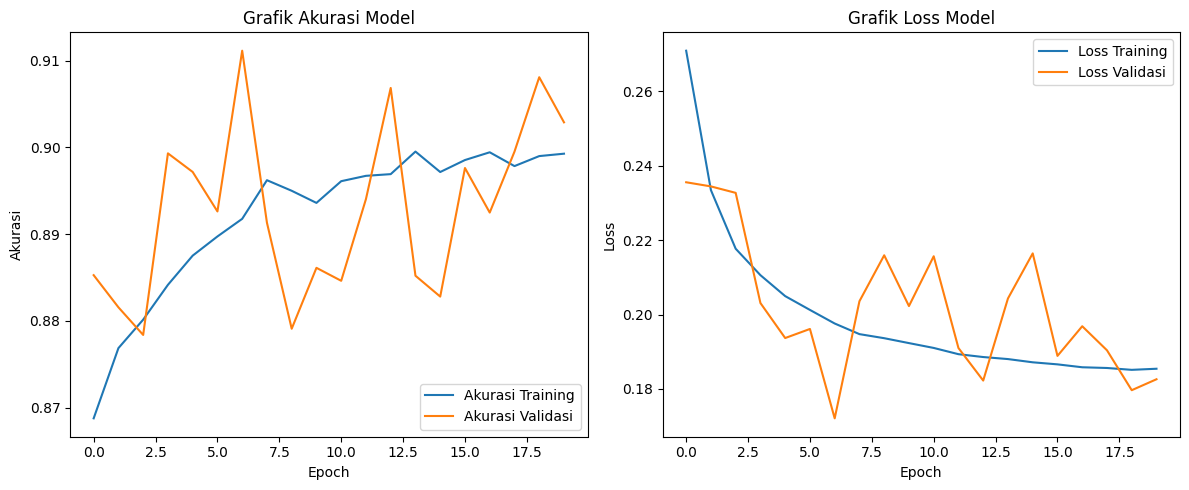

In [29]:
# --- Visualisasi Hasil Pelatihan ---
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Grafik Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Grafik Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluasi Model

601/601 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9012 - loss: 0.1849
Test Accuracy: 0.9029
601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     17509
           1       0.48      0.91      0.63      1721

    accuracy                           0.90     19230
   macro avg       0.73      0.90      0.78     19230
weighted avg       0.94      0.90      0.92     19230



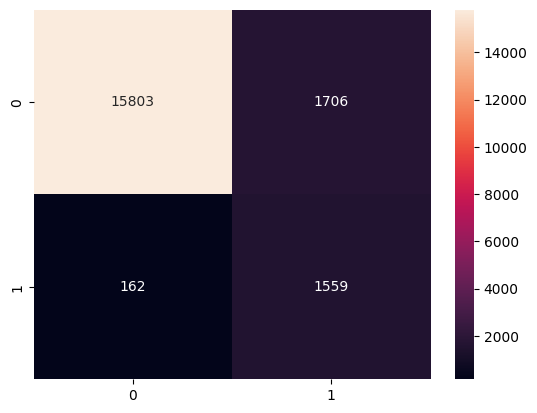

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

# Simpan Model dan Skaler

In [32]:
model.save("diabetes_model.keras")
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [28]:
# ====================================================================
# Melakukan Prediksi Berdasarkan Input Pengguna
# ====================================================================

# 1. Muat kembali model dan scaler yang sudah disimpan
try:
    loaded_model = tf.keras.models.load_model("diabetes_model.keras")
    loaded_scaler = joblib.load("scaler.pkl")
    print("Model dan Scaler berhasil dimuat!")
except Exception as e:
    print(f"Gagal memuat model atau scaler. Pastikan file 'diabetes_model.keras' dan 'scaler.pkl' ada di direktori yang sama. Error: {e}")

# 2. Buat fungsi untuk melakukan prediksi
def prediksi_diabetes():
    print("\n--- Masukkan Data Pasien untuk Prediksi Diabetes ---")

    # Kumpulkan input dari pengguna
    # Urutan fitur harus sama persis dengan urutan kolom pada saat training
    # ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

    try:
        gender_input = input("Jenis Kelamin (Male/Female/Other): ").strip().capitalize()
        age = float(input("Usia: "))
        hypertension = int(input("Memiliki Hipertensi (1=Ya, 0=Tidak): "))
        heart_disease = int(input("Memiliki Penyakit Jantung (1=Ya, 0=Tidak): "))
        smoking_input = input("Riwayat Merokok (never/No Info/current/former/ever/not current): ").strip()
        bmi = float(input("Indeks Massa Tubuh (BMI): "))
        hba1c_level = float(input("Kadar HbA1c: "))
        blood_glucose_level = int(input("Kadar Gula Darah: "))

        # 3. Ubah input kategorikal menjadi numerik (sesuai LabelEncoder)
        # Urutan ini didasarkan pada .fit_transform() default (urutan alfabetis)
        gender_map = {'Female': 0, 'Male': 1, 'Other': 2}
        smoking_map = {'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5}

        gender = gender_map.get(gender_input, -1)
        smoking_history = smoking_map.get(smoking_input, -1)

        if gender == -1 or smoking_history == -1:
            print("\nError: Input untuk 'Jenis Kelamin' atau 'Riwayat Merokok' tidak valid.")
            return

        # Buat array numpy dari input
        input_data = np.array([[
            gender, age, hypertension, heart_disease,
            smoking_history, bmi, hba1c_level, blood_glucose_level
        ]])

        # 4. Gunakan scaler yang sudah dimuat untuk mengubah skala input
        input_data_scaled = loaded_scaler.transform(input_data)

        # 5. Lakukan prediksi
        prediksi = loaded_model.predict(input_data_scaled)
        probabilitas = prediksi[0][0] # Ambil nilai probabilitas dari output model

        # 6. Tampilkan hasil
        print("\n--- Hasil Prediksi ---")
        print(f"Probabilitas mengidap diabetes: {probabilitas * 100:.2f}%")

        if probabilitas > 0.5:
            print("Kesimpulan: Berdasarkan data yang dimasukkan, pengguna ini **BERISIKO TINGGI** mengidap diabetes.")
        else:
            print("Kesimpulan: Berdasarkan data yang dimasukkan, pengguna ini **BERISIKO RENDAH** mengidap diabetes.")

    except ValueError:
        print("\nError: Pastikan Anda memasukkan angka yang valid untuk data numerik.")
    except Exception as e:
        print(f"\nTerjadi kesalahan: {e}")

# Panggil fungsi untuk memulai prediksi
prediksi_diabetes()

Model dan Scaler berhasil dimuat!

--- Masukkan Data Pasien untuk Prediksi Diabetes ---
Jenis Kelamin (Male/Female/Other): Female
Usia: 80.0	
Memiliki Hipertensi (1=Ya, 0=Tidak): 0
Memiliki Penyakit Jantung (1=Ya, 0=Tidak): 1
Riwayat Merokok (never/No Info/current/former/ever/not current): never
Indeks Massa Tubuh (BMI): 25.19
Kadar HbA1c: 6.6
Kadar Gula Darah: 140


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

--- Hasil Prediksi ---
Probabilitas mengidap diabetes: 82.41%
Kesimpulan: Berdasarkan data yang dimasukkan, pengguna ini **BERISIKO TINGGI** mengidap diabetes.
